<a href="https://colab.research.google.com/github/JoHyunjeong/Deep_learning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%A4%EC%8A%B5/2_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B3%80%ED%98%95%EA%B8%B0%EC%B4%88/Ch04_%E1%84%92%E1%85%B3%E1%86%A8%E1%84%87%E1%85%A2%E1%86%A8%E1%84%8F%E1%85%A1%E1%86%AF%E1%84%85%E1%85%A1%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%92%E1%85%AA%E1%86%AB_%E1%84%8B%E1%85%A9%E1%84%85%E1%85%A2%E1%84%83%E1%85%AC%E1%86%AB%E1%84%92%E1%85%B3%E1%86%A8%E1%84%87%E1%85%A2%E1%86%A8%E1%84%89%E1%85%A1%E1%84%8C%E1%85%B5%E1%86%AB%E1%84%8B%E1%85%B3%E1%86%AF%E1%84%92%E1%85%B3%E1%84%85%E1%85%B5%E1%86%BA%E1%84%92%E1%85%A1%E1%86%AB%E1%84%8F%E1%85%A5%E1%86%AF%E1%84%85%E1%85%A5%E1%84%89%E1%85%A1%E1%84%8C%E1%85%B5%E1%86%AB%E1%84%8B%E1%85%B3%E1%84%85%E1%85%A9%E1%84%87%E1%85%A9%E1%86%A8%E1%84%8B%E1%85%AF%E1%86%AB%E1%84%92%E1%85%A1%E1%84%80%E1%85%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 흑백사진을 칼라로!
--------------
## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    4. 전체 문제 구성은 좌측 첫 번째 아이콘을 통해 확인할 수 있습니다.

## 데이터 소개
    - 이번 주제의 데이터는 protrait 데이터로 유명한 PFCN dataset을 이용합니다.
  ![PFCN dataset](https://www.researchgate.net/profile/Dawei_Li49/publication/334417334/figure/fig4/AS:832930272276492@1575597460956/Sample-images-from-the-PFCN-dataset.jpg)

     위의 이미지는 다음과 같은 것을 보여줍니다.  
    - 800x600의 사람 portrait 이미지  
     - ?????.png  
    - 사람 영역에 대한 흑백 portrait 이미지
     - ?????_matte.png
    - pfcn_original
     - 원본 800x600 이미지들
    - pfcn_small
     - colab용 100x75 이미지들



- 데이터 출처: 
 - [PFCN dataset](https://1drv.ms/u/s!ApwdOxIIFBH19Ts5EuFd9gVJrKTo)
 - [pfcn_small](https://drive.google.com/file/d/1_q37TRIFwtwhmSeLu_4h3SkFHrDSjeyl/view?usp=sharing)

## 최종 목표

    - 작게 줄인 PFCN 데이터를 이용
    - 코렙에 구글 drive 연동
    - 큰 사진을 작게 줄이기
    - 이미지에 대한 오토인코더식 접근 방법
    - 칼라 사진을 흑백 사진으로 만드는 모델 이해
    - 흑백 사진을 칼라 사진으로 만드는 모델 이해

- 출제자 : 손근영 강사
---


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

## Step 1. 도입전 기본 처리

### 문제 1. 구글 drive와 colab 연동하기

In [ ]:
# https://onedrive.live.com/?authkey=%21ADkS4V32BUmspOg&cid=F5111408123B1D9C&id=F5111408123B1D9C%2115035&parId=F5111408123B1D9C%2115033&action=locate

In [ ]:
from google.colab import drive

drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
!ls -al '/gdrive/MyDrive/패스트캠퍼스/Part 2/dataset'

total 134075
drwx------ 2 root root      4096 Feb 20 08:06 pfcn_original
-rw------- 1 root root 137288603 Feb 20 06:49 pfcn_small.npz


### 문제 2. pfcn 데이터 살펴보기

In [ ]:
# 데이터를 np array로 training에서 사람 이미지 한장을 불러오는 코드를 작성해주세요. (x로 변수 대입)

In [ ]:
import imageio

x = imageio.imread('/gdrive/MyDrive/패스트캠퍼스/Part 2/dataset/pfcn_original/training/00005.png')

In [ ]:
type(x)

imageio.core.util.Array

### 문제 3. x와 shape을 출력해보세요.

In [ ]:
# 데이터의 크기를 shape 함수를 통해 출력해주세요.

In [ ]:
x.shape

(800, 600, 3)

### 문제 4. x를 plt를 통하여 출력하세요.

In [ ]:
# x를 plt를 이용하여 출력하는 코드를 작성해보세요.

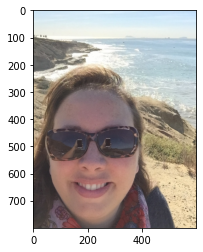

In [ ]:
plt.imshow(x)
plt.show()

### 문제 5. (800, 600)의 의미지는 colab에서 돌리기에 너무 큽니다. (100, 75)로 이미지를 줄여보세요

In [ ]:
# x를 (800, 600, 3) -> (100, 75, 3)로 줄이고 plt에서 확인하는 코드를 작성하세요.

In [ ]:
from skimage.transform import resize

x1 = resize(x, (100, 75))

In [ ]:
x1.shape

(100, 75, 3)

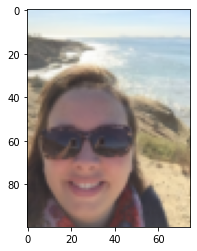

In [ ]:
plt.imshow(x1)
plt.show()

In [ ]:
import glob

glob.glob('/gdrive/MyDrive/패스트캠퍼스/Part 2/dataset/pfcn_original/training/?????.png')[:5] # 해당 경로에 있는 이미지들을 리스트 형태로 얻어올 수 있음

['/gdrive/MyDrive/패스트캠퍼스/Part 2/dataset/pfcn_original/training/00179.png',
 '/gdrive/MyDrive/패스트캠퍼스/Part 2/dataset/pfcn_original/training/00178.png',
 '/gdrive/MyDrive/패스트캠퍼스/Part 2/dataset/pfcn_original/training/00187.png',
 '/gdrive/MyDrive/패스트캠퍼스/Part 2/dataset/pfcn_original/training/00185.png',
 '/gdrive/MyDrive/패스트캠퍼스/Part 2/dataset/pfcn_original/training/00186.png']

### 문제 6. pfcn_small.npz 데이터에서 학습, 테스트 데이터를 로드하세요.

In [ ]:
# pfcn_small.npz에서 train_images, test_images를 np array로 로드하세요.

In [ ]:
pfcn_small = np.load('/gdrive/MyDrive/패스트캠퍼스/Part 2/dataset/pfcn_small.npz')

In [ ]:
train_images = pfcn_small['train_images']
test_images = pfcn_small['test_images']

### 문제 7. train_images에서 0이 아닌 값들을 출력해보세요.

In [ ]:
# 하나의 이미지에 대한 모든 0이 아닌 값을 출력하는 코드를 작성하세요.

In [ ]:
train_images[train_images != 0][:10]

array([0.23627451, 0.34803922, 0.64705882, 0.24509804, 0.35686275,
       0.65588235, 0.25490196, 0.36470588, 0.66470588, 0.2372549 ])

### 문제 8. train_images의 dtype을 출력해보세요.

In [ ]:
# dtype을 이용하여 이미지의 np array type을 확인해보세요.

In [ ]:
train_images.dtype

dtype('float64')

## Step 2. 전처리

### 문제 9. train/test 이미지 데이터의 범위 확인

In [ ]:
#  test_images shape과 dtype, 0이 아닌 숫자를 출력하는 코드를 작성하세요.

In [ ]:
print(train_images.shape, train_images.dtype)
print(train_images[train_images != 0][:10])

print(test_images.shape, test_images.dtype)
print(test_images[test_images != 0][:10])

(1700, 100, 75, 3) float64
[0.23627451 0.34803922 0.64705882 0.24509804 0.35686275 0.65588235
 0.25490196 0.36470588 0.66470588 0.2372549 ]
(300, 100, 75, 3) float64
[0.50980392 0.64117647 0.64313725 0.51568627 0.64705882 0.64901961
 0.53823529 0.65588235 0.66372549 0.52843137]


### 문제 10. train/test 이미지 데이터의 최소/최대값을 출력

In [ ]:
# train/test 전체 데이터에서 min, max를 출력하는 코드를 작성하세요.

In [ ]:
print(train_images.min(), train_images.max())
print(test_images.min(), test_images.max())

0.0 1.0
0.0 1.0


### 문제 11. train_images와 test_images로 흑백인 train_gray_images, test_gray_images를 생성하세요.

In [ ]:
# train_images와 test_images로 흑백인 train_gray_images, test_gray_images를 생성하세요.

In [ ]:
train_images[0].shape

(100, 75, 3)

In [ ]:
from skimage import color

train_gray_images = np.array([color.rgb2gray(img).reshape((100, 75, 1)) for img in train_images])
test_gray_images = np.array([color.rgb2gray(img).reshape((100, 75, 1)) for img in test_images])

print(train_gray_images.shape, test_gray_images.shape)

(1700, 100, 75, 1) (300, 100, 75, 1)


## Step 3. 시각화 방법

### 문제 12. train_image의 이미지를 5장 획득하여 (5, 100, 75, 3)의 shape을 출력하세요.

In [ ]:
# (배치, 100, 75, 3)인 train_images에서 (5, 100, 75, 3)을 획득하는 코드를 작성하세요.

In [ ]:
train_images[:5].shape

(5, 100, 75, 3)

### 문제 13. 획득한 5장의 의미지를 (100, 75 * 5, 3)의 shape으로 변경해보세요.

In [ ]:
# np.hstack은 height 방향의 배열을 풀어서 width 방향으로 연결해줍니다.
# 해당 기능을 쓰면 (height, image_height, image_width, color)의 shape을 (image_height, image_width * height, color)으로 바꿔 줄 수 있습니다.
# 코드를 작성해보세요.

In [ ]:
np.hstack(train_images[:5]).shape

(100, 375, 3)

In [ ]:
train_images[:5].transpose((1,0,2,3)).reshape(100,-1,3).shape

(100, 375, 3)

### 문제 14. (100, 375, 3)이 된 tensor를 plt로 출력해보세요.

In [ ]:
# (28, 140, 3)의 이미지를 plt로 출력해보세요.

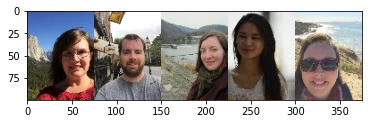

In [ ]:
plt.imshow(np.hstack(train_images[:5]))
plt.show()

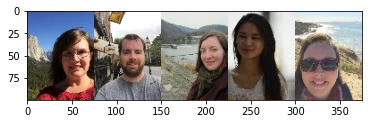

In [ ]:
plt.imshow(train_images[:5].transpose((1,0,2,3)).reshape(100,-1,3))
plt.show()

### 문제 15. gray도 (100, 375)으로 plt로 출력해보세요.

In [ ]:
# (28, 140, 1)의 이미지를 plt로 출력해보세요.

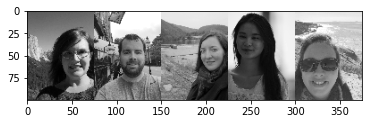

In [ ]:
plt.imshow(np.hstack(train_gray_images[:5][...,0]), cmap='gray')
plt.show()

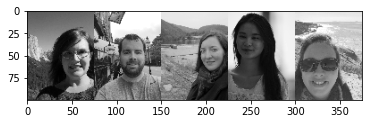

In [ ]:
plt.imshow(train_gray_images[:5][...,0].transpose((1,0,2)).reshape(100,-1), cmap='gray')
plt.show()

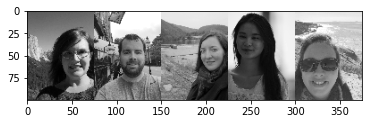

In [ ]:
plt.imshow(train_gray_images[:5].transpose((1,0,2,3)).reshape(100,-1), cmap='gray')
plt.show()

## Step 4. 흑백 -> 칼라 모델링

### 문제 16. 흑백 이미지를 칼라로 변환하는 모델을 작성하세요.

In [ ]:
# input (100, 75, 1), output (100, 75, 3)을 처리할 수 있는 모래시계 모양의 모델을 작성하세요.

In [ ]:
from keras.layers import Input, Conv2D, Conv2DTranspose, Dense, Flatten, Reshape, MaxPool2D
from keras.layers import BatchNormalization, Activation, concatenate, Dropout
from keras.models import Model

def conv2d_block(x, channel):
  x = Conv2D(channel, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(channel, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  return x  

def unet_color():
  inputs = Input((100, 75, 1))
  
  c1 = conv2d_block(inputs, 16)
  p1 = MaxPool2D(2)(c1)
  p1 = Dropout(0.1)(p1)

  c2 = conv2d_block(p1, 32)
  p2 = MaxPool2D(2)(c2)
  p2 = Dropout(0.1)(p2)

  c3 = conv2d_block(p2, 64)
  p3 = MaxPool2D(2)(c3)
  p3 = Dropout(0.1)(p3)

  c4 = conv2d_block(p3, 128)
  p4 = MaxPool2D(2)(c4)
  p4 = Dropout(0.1)(p4)

  c5 = conv2d_block(p4, 256)

  u6 = Conv2DTranspose(128, 2, 2, padding='valid', output_padding=(0,1))(c5)
  u6 = concatenate([u6, c4])
  u6 = Dropout(0.1)(u6)
  c6 = conv2d_block(u6, 128)

  u7 = Conv2DTranspose(64, 2, 2, padding='valid', output_padding=(1,0))(c6)
  u7 = concatenate([u7, c3])
  u7 = Dropout(0.1)(u7)
  c7 = conv2d_block(u7, 64)

  u8 = Conv2DTranspose(32, 2, 2, padding='valid', output_padding=(0,1))(c7)
  u8 = concatenate([u8, c2])
  u8 = Dropout(0.1)(u8)
  c8 = conv2d_block(u8, 32)

  u9 = Conv2DTranspose(16, 2, 2, padding='valid', output_padding=(0,1))(c8)
  u9 = concatenate([u9, c1])
  u9 = Dropout(0.1)(u9)
  c9 = conv2d_block(u9, 16)

  outputs = Conv2D(3, 1, activation='sigmoid')(c9)
  model = Model(inputs, outputs)
  return model

### 문제 17. 모델을 할당 받고 서머리를 출력해보세요.

In [ ]:
# unet_color() 모델을 할당 받고 서머리를 출력하는 코드를 작성하세요.

In [ ]:
model = unet_color()
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 100, 75, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_251 (Conv2D)            (None, 100, 75, 16)  160         ['input_16[0][0]']               
                                                                                                  
 batch_normalization_238 (Batch  (None, 100, 75, 16)  64         ['conv2d_251[0][0]']             
 Normalization)                                                                                   
                                                                                           

### 문제 18. 만든 모델에 로스와 옵티마이저, 메트릭을 설정하세요.

In [ ]:
# 만든 모델에 loss는 mse, optimizer는 adam 매트릭은 accuracy으로 설정하는 코드를 작성하세요.

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy']) # 색깔을 맞추는 모델에서는 mse보다 mae가 좋음(mse는 조금 뿌옇게 될 수 있음)

### 문제 19. 만든 모델에 train_gray_images, train_images를 학습시켜 보세요.

In [ ]:
# train_gray_images 학습시키고 50 epochs을 돌리고 그 진행 사항을 hist에 저장하는 코드를 작성하세요.

In [ ]:
hist = model.fit(train_gray_images, train_images, validation_data=(test_gray_images, test_images), epochs=50, verbose=1)

Epoch 1/50
54/54 [==============================] - 15s 132ms/step - loss: 0.0276 - accuracy: 0.5821 - val_loss: 0.1021 - val_accuracy: 0.3610
Epoch 2/50
54/54 [==============================] - 6s 119ms/step - loss: 0.0121 - accuracy: 0.6325 - val_loss: 0.0676 - val_accuracy: 0.5093
Epoch 3/50
54/54 [==============================] - 7s 125ms/step - loss: 0.0098 - accuracy: 0.6218 - val_loss: 0.0804 - val_accuracy: 0.2075
Epoch 4/50
54/54 [==============================] - 7s 123ms/step - loss: 0.0088 - accuracy: 0.6232 - val_loss: 0.0588 - val_accuracy: 0.5278
Epoch 5/50
54/54 [==============================] - 7s 126ms/step - loss: 0.0083 - accuracy: 0.6311 - val_loss: 0.0479 - val_accuracy: 0.6030
Epoch 6/50
54/54 [==============================] - 7s 131ms/step - loss: 0.0077 - accuracy: 0.6382 - val_loss: 0.0434 - val_accuracy: 0.6388
Epoch 7/50
54/54 [==============================] - 7s 122ms/step - loss: 0.0075 - accuracy: 0.6442 - val_loss: 0.0277 - val_accuracy: 0.5911
Epoch

### 문제 20. 학습 진행 사항을 plt으로 출력하세요.

In [ ]:
# hist의 accuracy plt의 plot을 이용하여 출력하는 코드를 작성하세요.

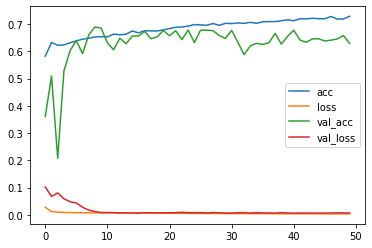

In [ ]:
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

## Step 5. 칼라 모델 결과 확인

### 문제 21. 완성된 모델에서 test_gray_images를 1장 넣고 결과를 res 변수에 저정하세요.

In [ ]:
# 모델에 test_gray_images 중 1장을 넣고 결과를 받는 코드를 작성하세요.

In [ ]:
test_gray_images[0:1].shape

(1, 100, 75, 1)

In [ ]:
res = model.predict(test_gray_images[1:2])

### 문제 22. res와 test_images[1]를 width 방향으로 결합하여 plt로 출력하세요.

In [ ]:
# res와 test_images[1]를 width 방향으로 결합하여 (100, 75 * 3, 3) 의 이미지를 만들어 plt로 출력하는 코드를 작성하세요.

In [ ]:
res.shape

(1, 100, 75, 3)

In [ ]:
test_images[1].shape

(100, 75, 3)

In [ ]:
np.concatenate([res[0], test_images[1]],axis=1).shape

(100, 150, 3)

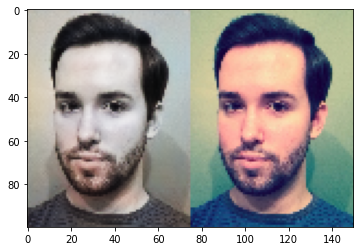

In [ ]:
plt.imshow(np.concatenate([res[0], test_images[1]],axis=1))
plt.show()

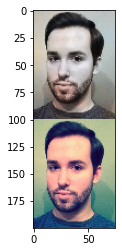

In [ ]:
plt.imshow(np.concatenate([res[0], test_images[1]]))
plt.show()

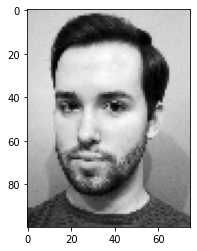

In [ ]:
plt.imshow(test_gray_images[1].reshape(100,-1), cmap='gray')
plt.show()

Epoch 1/10
54/54 [==============================] - 11s 136ms/step - loss: 0.1250 - accuracy: 0.2926 - val_loss: 0.2239 - val_accuracy: 0.5378
Epoch 2/10
54/54 [==============================] - 7s 124ms/step - loss: 0.0752 - accuracy: 0.4765 - val_loss: 0.2224 - val_accuracy: 0.6892
Epoch 3/10
54/54 [==============================] - 6s 120ms/step - loss: 0.0659 - accuracy: 0.5723 - val_loss: 0.2111 - val_accuracy: 0.6880
Epoch 4/10
54/54 [==============================] - 6s 120ms/step - loss: 0.0611 - accuracy: 0.6132 - val_loss: 0.1916 - val_accuracy: 0.6874
Epoch 5/10
54/54 [==============================] - 7s 125ms/step - loss: 0.0584 - accuracy: 0.6253 - val_loss: 0.1723 - val_accuracy: 0.6840
Epoch 6/10
54/54 [==============================] - 6s 120ms/step - loss: 0.0568 - accuracy: 0.6347 - val_loss: 0.1499 - val_accuracy: 0.6639
Epoch 7/10
54/54 [==============================] - 6s 120ms/step - loss: 0.0561 - accuracy: 0.6318 - val_loss: 0.1261 - val_accuracy: 0.6224
Epoch

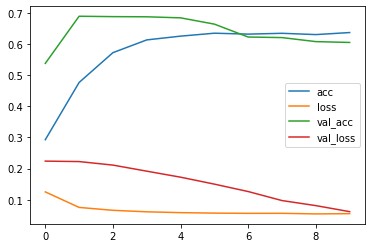

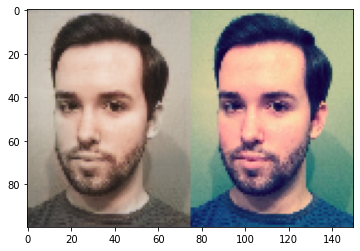

In [ ]:
# loss function을 mae로 설정
model1 = unet_color()
model1.compile(loss='mae', optimizer='adam', metrics=['accuracy']) # 색깔을 맞추는 모델에서는 mse보다 mae가 좋음(mse는 조금 뿌옇게 될 수 있음)
hist1 = model1.fit(train_gray_images, train_images, validation_data=(test_gray_images, test_images), epochs=10, verbose=1)

plt.plot(hist1.history['accuracy'], label='acc')
plt.plot(hist1.history['loss'], label='loss')
plt.plot(hist1.history['val_accuracy'], label='val_acc')
plt.plot(hist1.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

res = model1.predict(test_gray_images[1:2])
plt.imshow(np.concatenate([res[0], test_images[1]],axis=1))
plt.show()

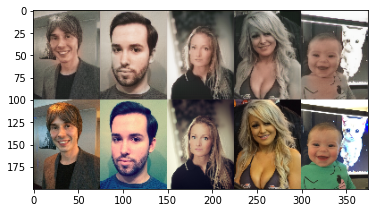

In [ ]:
five = model1.predict(test_gray_images[:5])
imgs = np.concatenate([five, test_images[:5]], axis=1).transpose((1,0,2,3)).reshape(200, -1, 3)
plt.imshow(imgs)
plt.show()

### 문제 23. 5장의 test_gray_images를 모델에 넣은 뒤 결과를 문제 29 방식으로 비교하세요.

In [ ]:
# 5장의 이미지를 모델에 넣고 결과를 29번과 같은 방식으로 비교하는 코드를 작성하세요.

In [ ]:
five = model.predict(test_gray_images[:5])

five.shape

(5, 100, 75, 3)

In [ ]:
test_images[:5].shape

(5, 100, 75, 3)

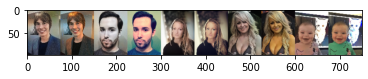

In [ ]:
imgs = np.concatenate([five, test_images[:5]], axis=2).transpose((1,0,2,3)).reshape(100, -1, 3)
plt.imshow(imgs)
plt.show()

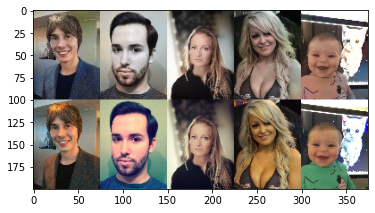

In [ ]:
imgs = np.concatenate([five, test_images[:5]], axis=1).transpose((1,0,2,3)).reshape(200, -1, 3)
plt.imshow(imgs)
plt.show()

## Step 6. lab 칼라 모델링

lab 칼라 : color 두 차원 + L(Light)  
a : R, G / b : Y, B 를 담당하는 축  


### 문제 24. rgb 칼라를 lab 칼라로 바꿔보세요. (위의 color 모델이 잘못된 것은 아님)

In [ ]:
# rgb2lab을 이용하여 rgb 칼라를 lab 칼라로 바꾸는 코드를 작성하세요.

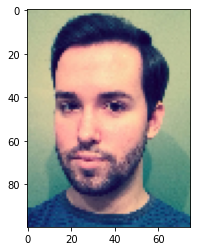

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


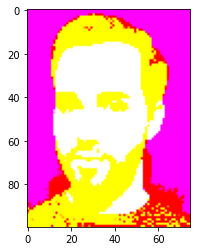

In [ ]:
plt.imshow(test_images[1])
plt.show()

plt.imshow(color.rgb2lab(test_images[1]))
plt.show()

In [ ]:
print(test_images[0].shape)
print(color.rgb2lab(test_images[0]).shape)

(100, 75, 3)
(100, 75, 3)


In [ ]:
train_lab_images = np.array([color.rgb2lab(img) for img in train_images])
test_lab_images = np.array([color.rgb2lab(img) for img in test_images])

### 문제 25. lab 칼라 이미지를 채널별로 최대, 최소 값을 출력해보세요.

In [ ]:
# lab 칼라 이미지를 채널별로 최대, 최소 값을 출력하는 코드를 작성하세요.

In [ ]:
print(train_lab_images[...,0].min(), train_lab_images[...,0].max()) # L(light, 밝기, 0~100)
print(train_lab_images[...,1].min(), train_lab_images[...,1].max()) # a 채널(+-128)
print(train_lab_images[...,2].min(), train_lab_images[...,2].max()) # b 채널(+-128)

0.0 100.0
-78.53736435567544 86.20773183914271
-91.97308466277427 93.80664030542576


### 문제 26. lab 칼라는 채널별 최대값을 [0-100, +-128, +-128]로 가지고 있습니다. 0-1 노말라이즈 하세요.

In [ ]:
# lab 칼라를 노말라이즈 하는 코드를 작성하세요.

In [ ]:
# L : 0 ~ 100 + 0 -> 0 ~ 100
# a : -128 ~ +127 + 128 -> 0 ~ 255
# b : -128 ~ +127 + 128 -> 0 ~ 255

a = train_lab_images + [0, 128, 128]
print(a[...,0].min(), a[...,0].max())
print(a[...,1].min(), a[...,1].max())
print(a[...,2].min(), a[...,2].max())

0.0 100.0
49.462635644324564 214.2077318391427
36.02691533722573 221.80664030542576


In [ ]:
# L : 0 ~ 100 + 0 -> 0 ~ 100 / 100 -> 0 ~ 1
# a : -128 ~ +127 + 128 -> 0 ~ 255 / 255 -> 0 ~ 1
# b : -128 ~ +127 + 128 -> 0 ~ 255 / 255 -> 0 ~ 1

b = a / [100, 255, 255]
print(b[...,0].min(), b[...,0].max())
print(b[...,1].min(), b[...,1].max())
print(b[...,2].min(), b[...,2].max())

0.0 1.0
0.19397112017382181 0.8400303209378145
0.141282020930297 0.8698299619820618


In [ ]:
train_lab_images = (train_lab_images + [0, 128, 128])/[100, 255, 255] 
test_lab_images = (test_lab_images + [0, 128, 128])/[100, 255, 255] 

In [ ]:
print(train_lab_images[...,0].min(), train_lab_images[...,0].max()) # L(light, 밝기, 0~100)
print(train_lab_images[...,1].min(), train_lab_images[...,1].max()) # a 채널(+-128)
print(train_lab_images[...,2].min(), train_lab_images[...,2].max()) # b 채널(+-128)

0.0 1.0
0.19397112017382181 0.8400303209378145
0.141282020930297 0.8698299619820618


### 문제 27. lab 칼라의 이미지 하나를 고르고 첫번째 채널을 plt으로 출력해보세요.


In [ ]:
# lab 칼라 이미지의 첫번째 채널을 plt로 출력하는 코드를 작성하세요.

In [ ]:
test_lab_images[1][...,0].shape # L 채널

(100, 75)

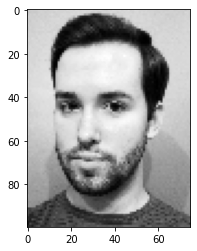

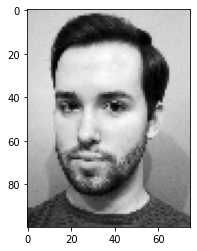

In [ ]:
plt.imshow(test_lab_images[1][...,0], cmap='gray') # L 채널
plt.show()

plt.imshow(test_gray_images[1][...,0], cmap='gray')
plt.show()

# L 칼라의 채널은 0~1 사이로 잘 정규화를 하면 RGB의 흑백사진을 0~1로 정규화한 값과 동일한 영역이 됨
# grayscale x => r ?, g ?, b ? (3가지 예측)
# L x =>         a ?, b ? (2가지 예측)

# model1(grayscale x) => R ?, g ?, b ?
# model2(L x) => a ?, b ? => Lx + a?b? => rgb로 변환

### 문제 28. lab 칼라 첫번째 채널로 나머지 2채널을 예측하는 모델을 작성하세요.

In [ ]:
# input (100, 75, 1), output (100, 75, 2)을 처리할 수 있는 모래시계 모양의 모델을 작성하세요.

In [ ]:
from keras.layers import Input, Conv2D, Conv2DTranspose, Dense, Flatten, Reshape, MaxPool2D
from keras.layers import BatchNormalization, Activation, concatenate, Dropout
from keras.models import Model

def conv2d_block(x, channel):
  x = Conv2D(channel, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(channel, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  return x  

def unet_lab():
  inputs = Input((100, 75, 1))
  
  c1 = conv2d_block(inputs, 16)
  p1 = MaxPool2D(2)(c1)
  p1 = Dropout(0.1)(p1)

  c2 = conv2d_block(p1, 32)
  p2 = MaxPool2D(2)(c2)
  p2 = Dropout(0.1)(p2)

  c3 = conv2d_block(p2, 64)
  p3 = MaxPool2D(2)(c3)
  p3 = Dropout(0.1)(p3)

  c4 = conv2d_block(p3, 128)
  p4 = MaxPool2D(2)(c4)
  p4 = Dropout(0.1)(p4)

  c5 = conv2d_block(p4, 256)

  u6 = Conv2DTranspose(128, 2, 2, padding='valid', output_padding=(0,1))(c5) # 크기를 맞추기 위해 output_padding 사용(concatenate도 해야하므로 값이 같아야 함)
  u6 = concatenate([u6, c4])
  u6 = Dropout(0.1)(u6)
  c6 = conv2d_block(u6, 128)

  u7 = Conv2DTranspose(64, 2, 2, padding='valid', output_padding=(1,0))(c6) 
  u7 = concatenate([u7, c3])
  u7 = Dropout(0.1)(u7)
  c7 = conv2d_block(u7, 64)

  u8 = Conv2DTranspose(32, 2, 2, padding='valid', output_padding=(0,1))(c7)
  u8 = concatenate([u8, c2])
  u8 = Dropout(0.1)(u8)
  c8 = conv2d_block(u8, 32)

  u9 = Conv2DTranspose(16, 2, 2, padding='valid', output_padding=(0,1))(c8)
  u9 = concatenate([u9, c1])
  u9 = Dropout(0.1)(u9)
  c9 = conv2d_block(u9, 16)

  outputs = Conv2D(2, 1, activation='sigmoid')(c9) # output을 2로 수정
  model = Model(inputs, outputs)
  return model

### 문제 29. 모델을 할당 받고 서머리를 출력해보세요.

In [ ]:
# unet_lab() 모델을 할당 받고 서머리를 출력하는 코드를 작성하세요.

In [ ]:
model2 = unet_lab()
model2.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 100, 75, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_270 (Conv2D)            (None, 100, 75, 16)  160         ['input_17[0][0]']               
                                                                                                  
 batch_normalization_256 (Batch  (None, 100, 75, 16)  64         ['conv2d_270[0][0]']             
 Normalization)                                                                                   
                                                                                           

### 문제 30. 만든 모델에 로스와 옵티마이저, 메트릭을 설정하세요.

In [ ]:
# 만든 모델에 loss는 mae, optimizer는 adam 매트릭은 accuracy으로 설정하는 코드를 작성하세요.

In [ ]:
model2.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

### 문제 31. 만든 모델에 train_lab_images[...,0], train_lab_images[...,1:]를 학습시켜 보세요.

In [ ]:
# train_lab_images[...,0], 학습시키고 50 epochs을 돌리고 그 진행 사항을 hist에 저장하는 코드를 작성하세요.

In [ ]:
train_lab_images[...,0:1].shape

(1700, 100, 75, 1)

In [ ]:
train_lab_images[...,1:].shape

(1700, 100, 75, 2)

In [ ]:
hist2 = model2.fit(train_lab_images[...,0:1], train_lab_images[...,1:], 
                  validation_data=(test_lab_images[...,0:1], test_lab_images[...,1:]), epochs=50, verbose=1)

Epoch 1/50
54/54 [==============================] - 11s 141ms/step - loss: 0.0576 - accuracy: 0.5452 - val_loss: 0.0400 - val_accuracy: 0.5550
Epoch 2/50
54/54 [==============================] - 6s 119ms/step - loss: 0.0360 - accuracy: 0.5972 - val_loss: 0.0379 - val_accuracy: 0.5949
Epoch 3/50
54/54 [==============================] - 7s 125ms/step - loss: 0.0352 - accuracy: 0.6066 - val_loss: 0.0396 - val_accuracy: 0.5985
Epoch 4/50
54/54 [==============================] - 6s 119ms/step - loss: 0.0335 - accuracy: 0.6084 - val_loss: 0.0364 - val_accuracy: 0.5981
Epoch 5/50
54/54 [==============================] - 6s 119ms/step - loss: 0.0332 - accuracy: 0.6091 - val_loss: 0.0414 - val_accuracy: 0.6000
Epoch 6/50
54/54 [==============================] - 6s 119ms/step - loss: 0.0327 - accuracy: 0.6121 - val_loss: 0.0366 - val_accuracy: 0.5984
Epoch 7/50
54/54 [==============================] - 6s 119ms/step - loss: 0.0324 - accuracy: 0.6150 - val_loss: 0.0360 - val_accuracy: 0.6056
Epoch

### 문제 32. 학습 진행 사항을 plt으로 출력하세요.

In [ ]:
# hist의 accuracy plt의 plot을 이용하여 출력하는 코드를 작성하세요.

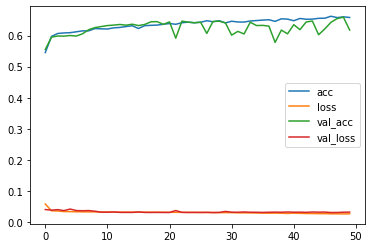

In [ ]:
plt.plot(hist2.history['accuracy'], label='acc')
plt.plot(hist2.history['loss'], label='loss')
plt.plot(hist2.history['val_accuracy'], label='val_acc')
plt.plot(hist2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## Step 7. lab 칼라 모델 결과 확인

### 문제 33. 완성된 모델에서 흑백이미지 1장 넣고 결과를 res 변수에 저정하세요.

In [ ]:
# 모델에 흑백이미지 중 1장을 넣고 결과를 받는 코드를 작성하세요.

In [ ]:
test_lab_images[1:2][...,0:1].shape

(1, 100, 75, 1)

In [ ]:
res = model2.predict(test_lab_images[1:2][...,0:1])

### 문제 34. res와 test_lab_images[...,1:]를 width 방향으로 결합하여 plt로 출력하세요.

1. L 채널 + a, b 채널
2. 결합한 결과를 RGB로 변환

In [ ]:
# res와 test_images[1]를 width 방향으로 결합하여 (100, 75 * 3, 3) 의 이미지를 만들어 plt로 출력하는 코드를 작성하세요.

In [ ]:
test_lab_images[0:1][...,0:1].shape, res.shape # 이 순서로 합쳐줘야 함

((1, 100, 75, 1), (1, 100, 75, 2))

In [ ]:
def l2rgb(l):
  pred_ab = model2.predict(np.expand_dims(l, 0)) # np.expand_dims() : 차원이 하나 늘어남
  pred_img = np.zeros((100, 75, 3))

  pred_img[:,:,0] = l.reshape((100, 75))
  pred_img[:,:,1:] = pred_ab[0]

  pred_lab = (pred_img * [100, 255, 255]) - [0, 128, 128] # denormalize
  rgb_img = color.lab2rgb(pred_lab)
  return rgb_img

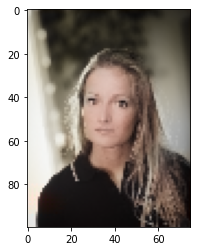

In [ ]:
plt.imshow(l2rgb(test_lab_images[2][...,0:1]))

### 문제 35. 5장의 test_lab_images를 모델에 넣은 뒤 결과를 문제 29 방식으로 비교하세요.

In [ ]:
# 5장의 이미지를 모델에 넣고 결과를 29번과 같은 방식으로 비교하는 코드를 작성하세요.

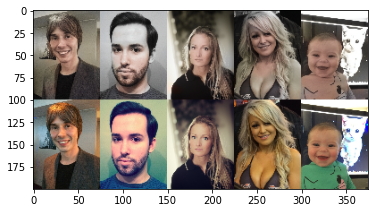

In [ ]:
five = np.array( [ l2rgb(img) for img in test_lab_images[:5][...,0] ] )

imgs = np.concatenate([five, test_images[:5]], axis=1).transpose((1,0,2,3)).reshape(200, -1, 3)
plt.imshow(imgs)
plt.show()

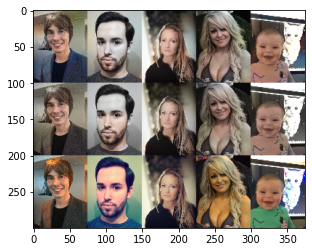

In [ ]:
# model1, model2(lab컬러), 원본 비교
five1 = model.predict(test_gray_images[:5])
five2 = np.array( [ l2rgb(img) for img in test_lab_images[:5][...,0] ] )

imgs = np.concatenate([five1, five2, test_images[:5]], axis=1).transpose((1,0,2,3)).reshape(300, -1, 3)
plt.imshow(imgs)
plt.show()

요즘은 lab컬러를 이산화해서 딱 255개 값을 갖도록 하여 classification하는 방식으로도 함  
  
\+ GAN 모델을 붙여서 색을 자연스럽게 표현함

## Step 8. 모델 저장 및 로드, 다운

### 문제 36. 모델을 저장하세요.

In [ ]:
# 모델을 저장하는 코드를 작성하세요.

In [ ]:
model.save('/gdrive/MyDrive/패스트캠퍼스/Part 2/unet_gray2rgb.h5')
model2.save('/gdrive/MyDrive/패스트캠퍼스/Part 2/unet_l2rgb.h5')

In [ ]:
!ls -al '/gdrive/MyDrive/패스트캠퍼스/Part 2'

total 73286
-rw------- 1 root root      101 Feb 20 07:51  checkpoint
drwx------ 3 root root     4096 Feb 20 06:50  dataset
-rw------- 1 root root  1667899 Feb 20 07:56 '[실습]Part2_Ch03_칼라_흑백_전환_칼라_사진을_흑백_사진으로_변경_하기.ipynb'
-rw------- 1 root root  2122711 Feb 20 14:55 '[실습]Part2_Ch04_흑백 칼라 전환 - 오래된 흑백 사진을 흐릿한 컬러 사진으로 복원하기.ipynb'
-rw------- 1 root root    18288 Feb 20 07:50  simple_rgb2gray.h5
-rw------- 1 root root     1133 Feb 20 07:51  simple_rgb2gray.weight.data-00000-of-00001
-rw------- 1 root root      631 Feb 20 07:51  simple_rgb2gray.weight.index
-rw------- 1 root root 23741400 Feb 20 14:55  unet_gray2rgb.h5
-rw------- 1 root root 23741208 Feb 20 14:55  unet_l2rgb.h5
-rw------- 1 root root 23745248 Feb 20 07:50  unet_rgb2gray.h5


### 문제 37. 모델 파일을 새로운 모델에 로드하세요.

In [ ]:
# 모델을 로드하는 코드를 작성하세요.

In [ ]:
new_model_1 = tf.keras.models.load_model('/gdrive/MyDrive/패스트캠퍼스/Part 2/unet_gray2rgb.h5')
new_model_1.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 100, 75, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_251 (Conv2D)            (None, 100, 75, 16)  160         ['input_16[0][0]']               
                                                                                                  
 batch_normalization_238 (Batch  (None, 100, 75, 16)  64         ['conv2d_251[0][0]']             
 Normalization)                                                                                   
                                                                                           

In [ ]:
new_model_2 = tf.keras.models.load_model('/gdrive/MyDrive/패스트캠퍼스/Part 2/unet_l2rgb.h5')
new_model_2.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 100, 75, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_270 (Conv2D)            (None, 100, 75, 16)  160         ['input_17[0][0]']               
                                                                                                  
 batch_normalization_256 (Batch  (None, 100, 75, 16)  64         ['conv2d_270[0][0]']             
 Normalization)                                                                                   
                                                                                           


### 문제 38. 로드한 모델을 test 데이터로 평가해보세요.


In [ ]:
# 로드한 모델을 test 데이터로 평가해보세요.

In [ ]:
acc, loss = new_model_1.evaluate(test_gray_images, test_images)
print(acc, loss)

10/10 [==============================] - 2s 46ms/step - loss: 0.0067 - accuracy: 0.6287
0.006746027618646622 0.6286644339561462


In [ ]:
acc, loss = model.evaluate(test_gray_images, test_images)
print(acc, loss)

10/10 [==============================] - 1s 51ms/step - loss: 0.0067 - accuracy: 0.6287
0.006746027618646622 0.6286644339561462


In [ ]:
acc, loss = new_model_2.evaluate(test_lab_images[...,0:1], test_lab_images[...,1:])
print(acc, loss)

10/10 [==============================] - 1s 52ms/step - loss: 0.0317 - accuracy: 0.6176
0.03169706463813782 0.6176190972328186


In [ ]:
acc, loss = model2.evaluate(test_lab_images[...,0:1], test_lab_images[...,1:])
print(acc, loss)

10/10 [==============================] - 1s 39ms/step - loss: 0.0317 - accuracy: 0.6176
0.03169706463813782 0.6176190972328186


### 문제 39. 모델을 내 컴퓨터에 저장해보세요

In [ ]:
# 모델을 내 컴퓨터에 저장해보세요.

In [ ]:
from google.colab import files

files.download('/gdrive/MyDrive/패스트캠퍼스/Part 2/unet_gray2rgb.h5')
files.download('/gdrive/MyDrive/패스트캠퍼스/Part 2/unet_l2rgb.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>